1. 수집된 데이터 확인하시고
2. 데이터 시각화
3. 분별력 없는 데이터 삭제
4. 데이터 나누기
    - 80%는 학습데이터, 20%는 테스트 데이터
5. 학습 데이터와 테스트 데이터 개수를 확인하세요.
6. 모델을 knn 모델을 학습 시키고,
7. 예측 정확도를 출력하세요.
8. 정답과 예측값을 데이터 프레임으로 출력해 보세요. <br>
========================================================= <br>
속성 설명 <br>
========================================= <br>
Player : 이름
Pos: 플레이어의 포지션을 나타냅니다. 'SG' 는 '슈팅가드' 'C'는 '센터'를 의미 <br>
3P : 3점슛 성공 횟수 <br>
2P : 2점슛 성공 횟수 <br>
TRB: 리바운드 성공 횟수 <br>
AST: 어시스트 성공 횟수 <br>
STL: 스틸 성공 횟수 <br>
BLK: 블로킹 성공 횟수

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

In [8]:
players = pd.read_csv('../data/ball.csv')
players.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [9]:
# 필요 없는 칼럼('player') 삭제
players = players.iloc[:,1:]
players.head()

,Pos,3P,2P,TRB,AST,STL,BLK
0,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,C,0.0,4.7,7.7,1.1,1.1,1.0
2,C,0.0,2.3,4.5,0.3,0.5,0.6
3,C,0.0,0.8,2.6,0.4,0.4,0.6
4,SG,1.5,3.5,4.3,3.4,0.8,0.5


In [45]:
players.corr()
# 3P(-0.787110), TRB(0.628595), BLK(0.700786)

,Pos,3P,2P,TRB,AST,STL,BLK
Pos,1.000000,-0.787110,0.290651,0.628595,-0.386874,-0.401425,0.700786
3P,-0.787110,1.000000,-0.094914,-0.498036,0.485010,0.353517,-0.534588
2P,0.290651,-0.094914,1.000000,0.680882,0.396094,0.353558,0.482056
TRB,0.628595,-0.498036,0.680882,1.000000,0.026689,0.130441,0.707542
AST,-0.386874,0.485010,0.396094,0.026689,1.000000,0.640802,-0.148161
STL,-0.401425,0.353517,0.353558,0.130441,0.640802,1.000000,-0.138208
BLK,0.700786,-0.534588,0.482056,0.707542,-0.148161,-0.138208,1.000000


In [13]:
# target variable이 categorical variable. SG : 0, C : 1로 치환
players['Pos'].replace(['SG', 'C'], [0, 1], inplace=True)
players.head()

,Pos,3P,2P,TRB,AST,STL,BLK
0,0,1.4,0.6,1.3,0.6,0.5,0.1
1,1,0.0,4.7,7.7,1.1,1.1,1.0
2,1,0.0,2.3,4.5,0.3,0.5,0.6
3,1,0.0,0.8,2.6,0.4,0.4,0.6
4,0,1.5,3.5,4.3,3.4,0.8,0.5


In [48]:
players2 = players[['Pos', '3P', 'TRB', 'BLK']]
players2.head()

,Pos,3P,TRB,BLK
0,0,1.4,1.3,0.1
1,1,0.0,7.7,1.0
2,1,0.0,4.5,0.6
3,1,0.0,2.6,0.6
4,0,1.5,4.3,0.5


In [50]:
# 테스트 사이즈를 20%로 train/test set을 나누기
X_train, X_test, y_train, y_test = train_test_split(players.iloc[:,1:], players['Pos'], random_state = 42, test_size = 0.2)

In [51]:
# 테스트 사이즈를 20%로 train/test set을 나누기
X2_train, X2_test, y2_train, y2_test = train_test_split(players2.iloc[:,1:], players['Pos'], random_state = 42, test_size = 0.2)

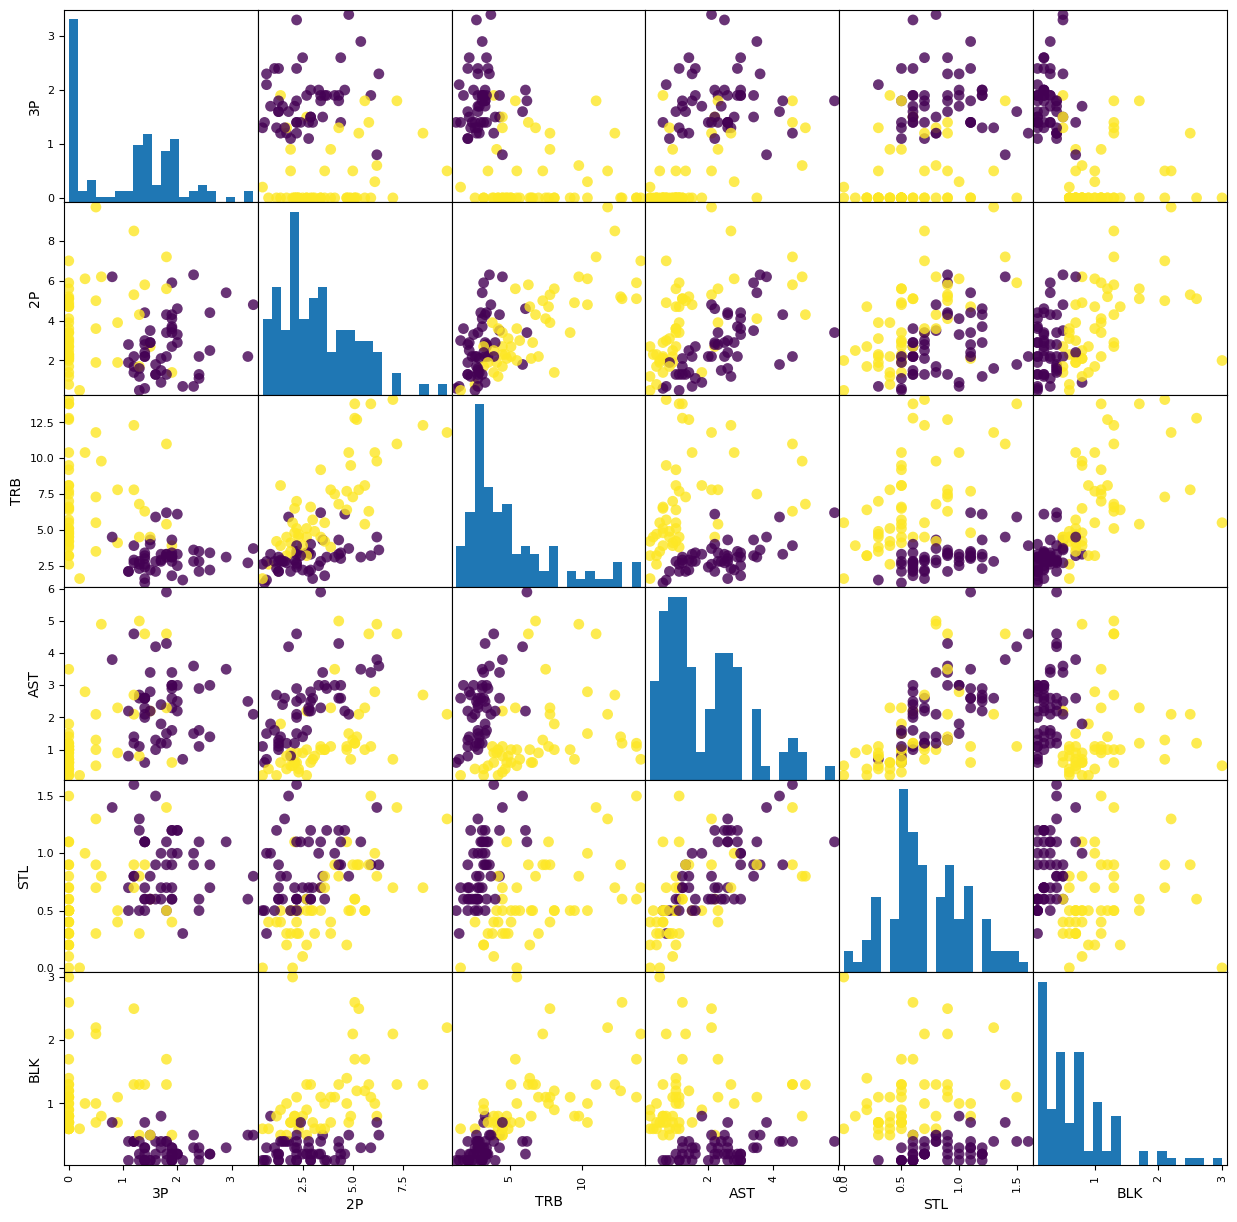

In [43]:
pd.plotting.scatter_matrix(players.drop('Pos', axis = 1), 
                           c=players['Pos'], figsize = (15,15), marker = 'o', hist_kwds = {'bins':20}, s = 60, alpha = .8);

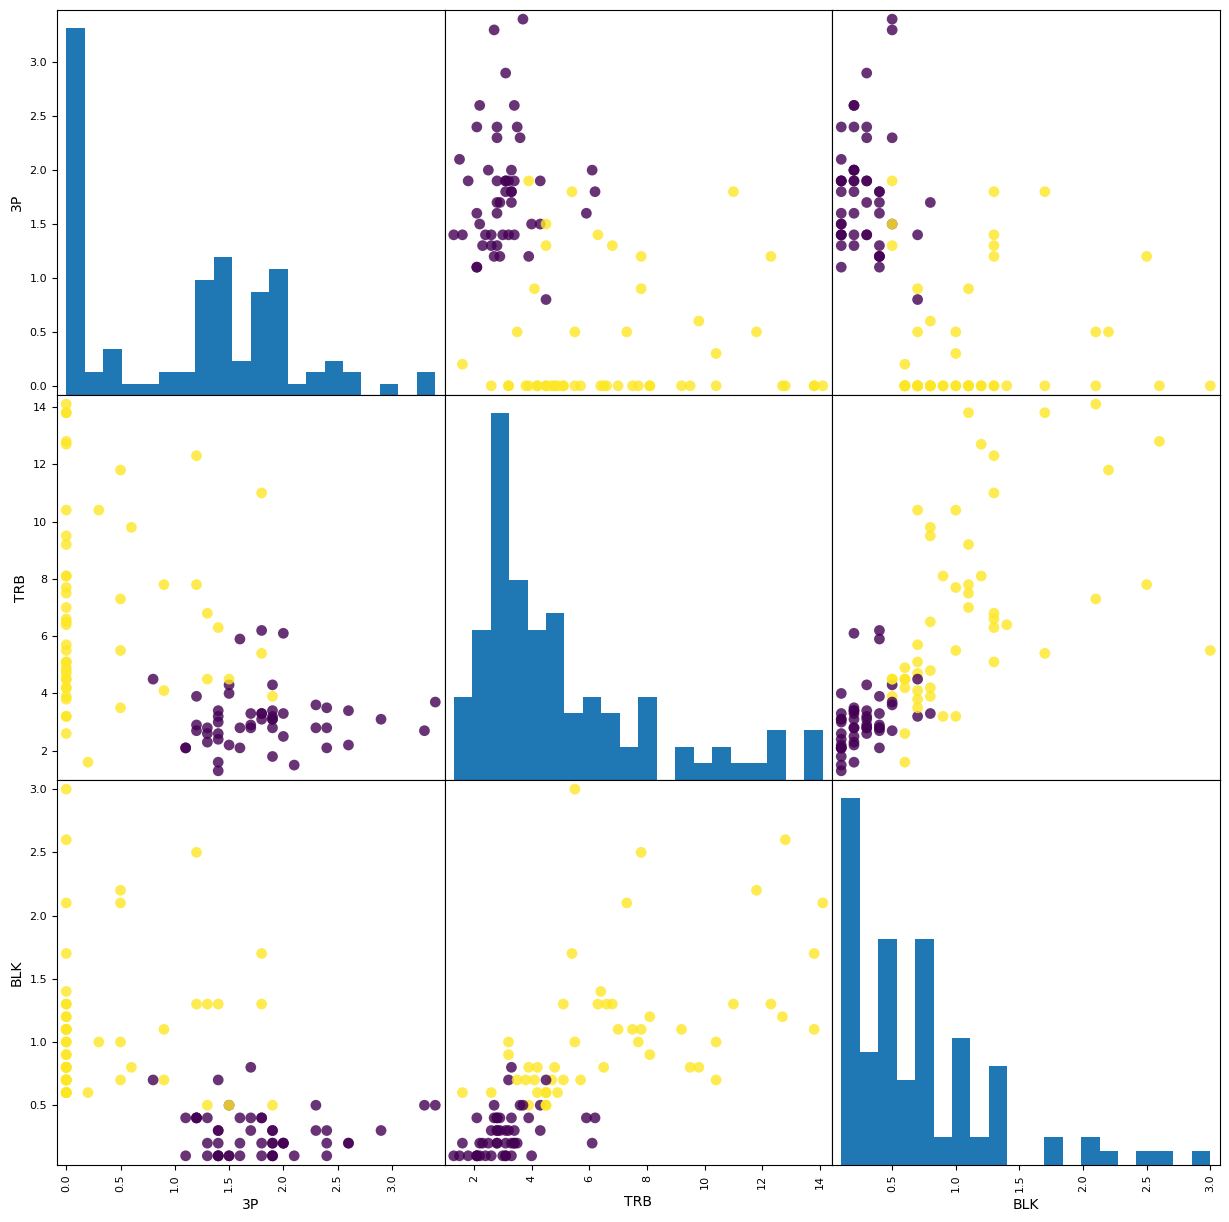

In [52]:
pd.plotting.scatter_matrix(players2.drop('Pos', axis = 1), 
                           c=players2['Pos'], figsize = (15,15), marker = 'o', hist_kwds = {'bins':20}, s = 60, alpha = .8);

In [19]:
# 학습데이터와 테스트 데이터 크기 확인
print("X_train 크기 : {}".format(X_train.shape))
print("y_train 크기 : {}".format(y_train.shape))
print("X_test 크기 : {}".format(X_test.shape))
print("y_test 크기 : {}".format(y_test.shape))

X_train 크기 : (80, 6)
y_train 크기 : (80,)
X_test 크기 : (20, 6)
y_test 크기 : (20,)


In [53]:
# 학습데이터와 테스트 데이터 크기 확인
print("X2_train 크기 : {}".format(X2_train.shape))
print("y2_train 크기 : {}".format(y2_train.shape))
print("X2_test 크기 : {}".format(X2_test.shape))
print("y2_test 크기 : {}".format(y2_test.shape))

X2_train 크기 : (80, 3)
y2_train 크기 : (80,)
X2_test 크기 : (20, 3)
y2_test 크기 : (20,)


In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)

KNeighborsClassifier()

In [24]:
y_pred = knn.predict(X_test)

In [55]:
y2_pred = knn2.predict(X2_test)

In [27]:
y_pred == y_test

83    True
53    True
70    True
45    True
44    True
39    True
22    True
80    True
10    True
0     True
18    True
30    True
73    True
33    True
90    True
4     True
76    True
77    True
12    True
31    True
Name: Pos, dtype: bool

In [56]:
y2_pred == y2_test

83     True
53     True
70     True
45     True
44     True
39     True
22     True
80     True
10     True
0      True
18     True
30     True
73    False
33     True
90     True
4     False
76     True
77     True
12     True
31     True
Name: Pos, dtype: bool

정확도

In [44]:
knn.score(X_test, y_test)

1.0

In [57]:
knn2.score(X2_test, y2_test)

0.9

In [26]:
print("정확도 : {:.4f}%".format(np.mean(y_pred == y_test)*100))
print("정확도 : {:.4f}%".format(knn.score(X_test, y_test)*100))
print("정확도 : {:.4f}%".format(metrics.accuracy_score(y_test, y_pred)*100))

정확도 : 100.0000%
정확도 : 100.0000%
정확도 : 100.0000%


In [59]:
print("정확도 : {:.4f}%".format(np.mean(y2_pred == y2_test)*100))
print("정확도 : {:.4f}%".format(knn2.score(X2_test, y2_test)*100))
print("정확도 : {:.4f}%".format(metrics.accuracy_score(y2_test, y2_pred)*100))

정확도 : 90.0000%
정확도 : 90.0000%
정확도 : 90.0000%


정답과 예측값을 데이터 프레임으로 출력

In [36]:
list_pred = y_pred.tolist()

df = pd.DataFrame({'예측값':list_pred, '실제값':y_test})
df.replace([0, 1], ['SG', 'C'], inplace=True)
df.head()

,예측값,실제값
83,C,C
53,C,C
70,SG,SG
45,SG,SG
44,C,C
